In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

sys.path.append('../backend/app/')

from preprocessing_data.encoders import preprocess_data
from algorithm import ga_core

# Pengaturan untuk tampilan plot
%matplotlib inline
sns.set(style="whitegrid")

In [14]:
DATA_PATH = '../data/Evolution_DataSets.csv' # Sesuaikan path jika perlu
try:
    df = pd.read_csv(DATA_PATH)
    print("Dataset berhasil dimuat!")
    print(f"Jumlah baris: {len(df)}, Jumlah kolom: {len(df.columns)}")
except FileNotFoundError:
    print(f"File tidak ditemukan di {DATA_PATH}. Pastikan path sudah benar.")
    df = None

Dataset berhasil dimuat!
Jumlah baris: 12000, Jumlah kolom: 28


In [15]:
if df is not None:
    print("\n--- 5 Baris Pertama ---")
    display(df.head())
    
    print("\n--- Info Dataset ---")
    df.info()
    
    print("\n--- Statistik Deskriptif (Kolom Numerik) ---")
    display(df.describe())
    
    print("\n--- Missing Values per Kolom ---")
    print(df.isnull().sum())


--- 5 Baris Pertama ---


,Genus_&_Specie,Time,Location,Zone,Current_Country,Habitat,Cranial_Capacity,Height,Incisor_Size,Jaw_Shape,...,biped,Arms,Foots,Diet,Sexual_Dimorphism,Hip,Vertical_Front,Anatomy,Migrated,Skeleton
0,hominino Orrorin tugenencin,6.041124,Africa,oriental,Kenya,forest,144.51410,110.24323,small,conical,...,low probability,climbing,climbing,dry fruits,high,wide,no,old,no,light
1,hominino Ardipithecus ramidus / kabadda,4.383910,Africa,oriental,Ethiopia,mixed,293.96021,107.69018,small,conical,...,high probability,climbing,climbing,soft fruits,medium-high,wide,no,old,no,light
2,Australopithecus Afarensis,3.749413,Africa,oriental,Kenya,mixed,264.79849,123.76644,big,U shape,...,yes,climbing,walk,dry fruits,high,slim,no,old,no,refined
3,Australopithecus Anamensis,4.595606,Africa,oriental,Kenya,forest-gallery,403.28047,111.40831,big,U shape,...,yes,climbing,climbing,dry fruits,high,wide,no,mixed,no,light
4,Australopithecus Africanus,3.614060,Africa,south,South Africa,forest-gallery,679.15233,111.59004,small,conical,...,yes,climbing,climbing,dry fruits,high,wide,yes,old,no,light



--- Info Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Genus_&_Specie           12000 non-null  object 
 1   Time                     12000 non-null  float64
 2   Location                 12000 non-null  object 
 3   Zone                     12000 non-null  object 
 4   Current_Country          12000 non-null  object 
 5   Habitat                  12000 non-null  object 
 6   Cranial_Capacity         12000 non-null  float64
 7   Height                   12000 non-null  float64
 8   Incisor_Size             12000 non-null  object 
 9   Jaw_Shape                12000 non-null  object 
 10  Torus_Supraorbital       12000 non-null  object 
 11  Prognathism              12000 non-null  object 
 12  Foramen_Mágnum_Position  12000 non-null  object 
 13  Canine Size              12000 non-null  object 
 14  

,Time,Cranial_Capacity,Height
count,12000.000000,12000.000000,12000.000000
mean,2.532665,616.824303,131.452198
std,1.776998,356.275762,24.539191
min,0.000529,0.074910,80.009030
25%,1.050566,334.430993,112.986802
50%,2.317031,511.320200,125.508305
75%,3.656959,919.807697,153.877355
max,7.699417,1448.397470,184.981450



--- Missing Values per Kolom ---
Genus_&_Specie             0
Time                       0
Location                   0
Zone                       0
Current_Country            0
Habitat                    0
Cranial_Capacity           0
Height                     0
Incisor_Size               0
Jaw_Shape                  0
Torus_Supraorbital         0
Prognathism                0
Foramen_Mágnum_Position    0
Canine Size                0
Canines_Shape              0
Tooth_Enamel               0
Tecno                      0
Tecno_type                 0
biped                      0
Arms                       0
Foots                      0
Diet                       0
Sexual_Dimorphism          0
Hip                        0
Vertical_Front             0
Anatomy                    0
Migrated                   0
Skeleton                   0
dtype: int64


In [ ]:
if df is not None:
    missing_values_count = df.isnull().sum().sum()
    if missing_values_count > 0:
        print(f"\nTerdapat {missing_values_count} missing values. Melakukan dropna().")
        df_cleaned = df.dropna()
        print(f"Jumlah baris setelah dropna(): {len(df_cleaned)}")
    else:
        print("\nTidak ada missing values terdeteksi.")
        df_cleaned = df.copy()


Tidak ada missing values terdeteksi.


In [ ]:
if df_cleaned is not None:
    # Contoh (PERLU DISESUAIKAN DENGAN CSV ANDA):
    potential_numerical_cols = ['Time','Cranial_Capacity','Height']
    potential_categorical_cols = ['Location', 'Zone', 'Current_Country',
                                 'Habitat', 'Incisor_Size', 'Jaw_Shape', 'Torus_Supraorbital', 
                                 'Prognathism', 'Foramen_Mágnum_Position', 'Canine Size', 
                                 'Canines_Shape', 'Tooth_Enamel', 'Tecno', 'Tecno_type', 'biped',
                                 'Arms', 'Foots', 'Diet', 'Sexual_Dimorphism', 'Hip', 'Vertical_Front',
                                 'Anatomy', 'Migrated', 'Skeleton']

    label_column = 'Genus_&_Specie'

    # Filter kolom yang benar-benar ada di DataFrame
    actual_numerical_cols = [col for col in potential_numerical_cols if col in df_cleaned.columns]
    actual_categorical_cols = [col for col in potential_categorical_cols if col in df_cleaned.columns]

    print(f"\nKolom numerik teridentifikasi: {actual_numerical_cols}")
    print(f"Kolom kategorikal teridentifikasi: {actual_categorical_cols}")
    print(f"Kolom label: {label_column}")

    # Cek apakah semua kolom yang dibutuhkan ada
    if not actual_numerical_cols and not actual_categorical_cols:
        print("PERINGATAN: Tidak ada kolom fitur yang teridentifikasi. Periksa nama kolom.")
    if label_column not in df_cleaned.columns:
        print(f"PERINGATAN: Kolom label '{label_column}' tidak ditemukan.")



Kolom numerik teridentifikasi: ['Time', 'Cranial_Capacity', 'Height']
Kolom kategorikal teridentifikasi: ['Location', 'Zone', 'Current_Country', 'Habitat', 'Incisor_Size', 'Jaw_Shape', 'Torus_Supraorbital', 'Prognathism', 'Foramen_Mágnum_Position', 'Canine Size', 'Canines_Shape', 'Tooth_Enamel', 'Tecno', 'Tecno_type', 'biped', 'Arms', 'Foots', 'Diet', 'Sexual_Dimorphism', 'Hip', 'Sexual_Dimorphism', 'Hip', 'Vertical_Front', 'Anatomy', 'Migrated', 'Skeleton']
Kolom label: Genus_&_Specie



--- Distribusi Fitur Numerik ---


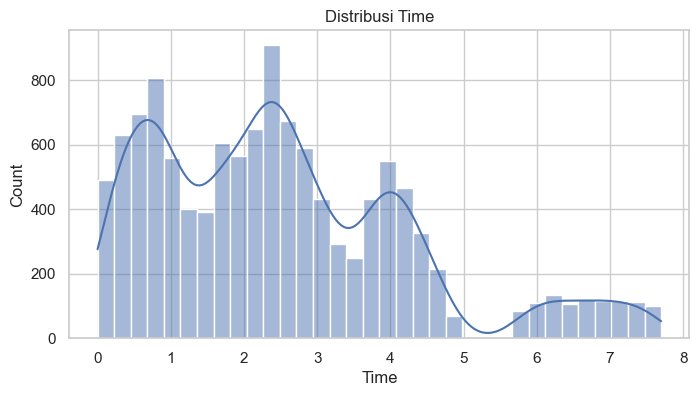

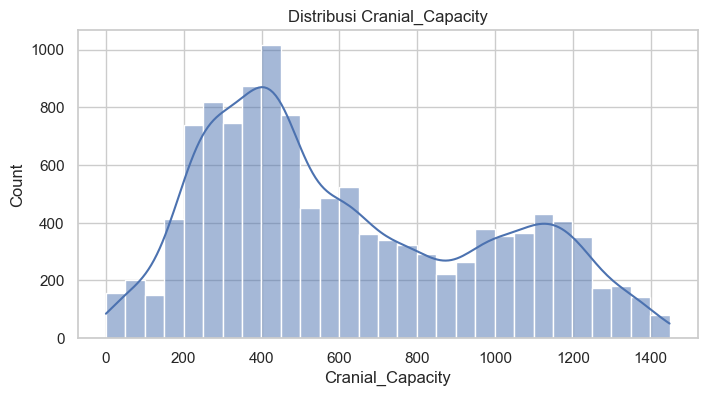

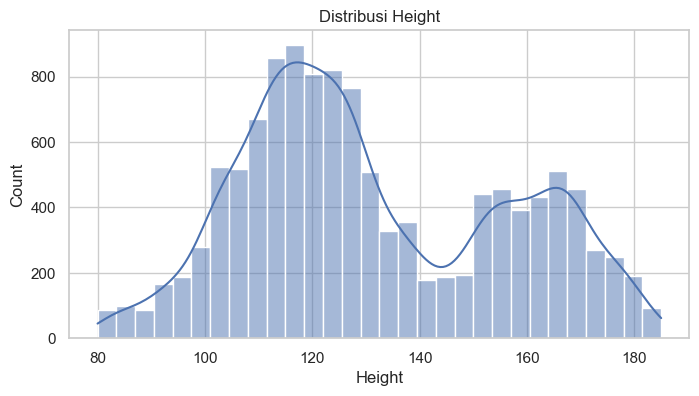


--- Boxplots Fitur Numerik (vs Label jika memungkinkan) ---


In [34]:
if df_cleaned is not None and actual_numerical_cols:
    print("\n--- Distribusi Fitur Numerik ---")
    for col in actual_numerical_cols:
        plt.figure(figsize=(8, 4))
        sns.histplot(df_cleaned[col], kde=True)
        plt.title(f'Distribusi {col}')
        plt.show()
        
    print("\n--- Boxplots Fitur Numerik (vs Label jika memungkinkan) ---")


--- Distribusi Fitur Kategorikal ---


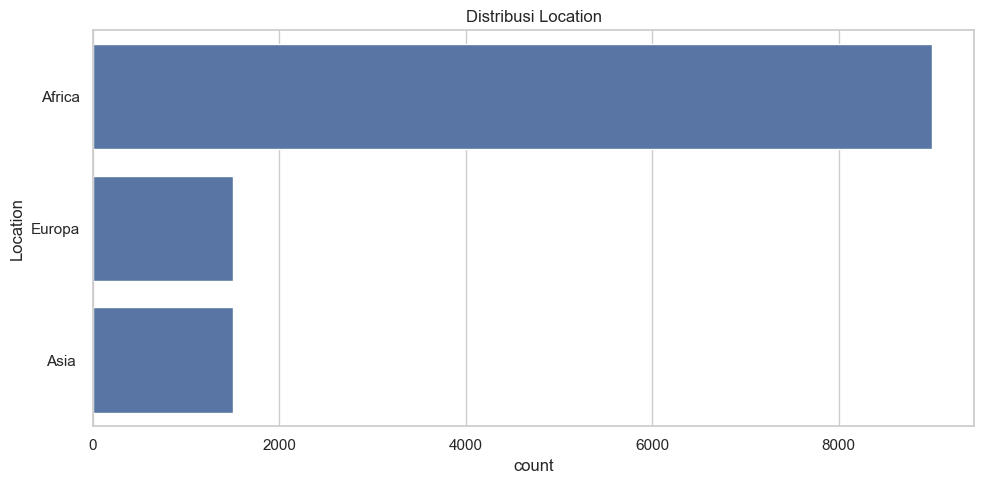


Value counts untuk Location:
Location
Africa    9000
Europa    1500
Asia      1500
Name: count, dtype: int64


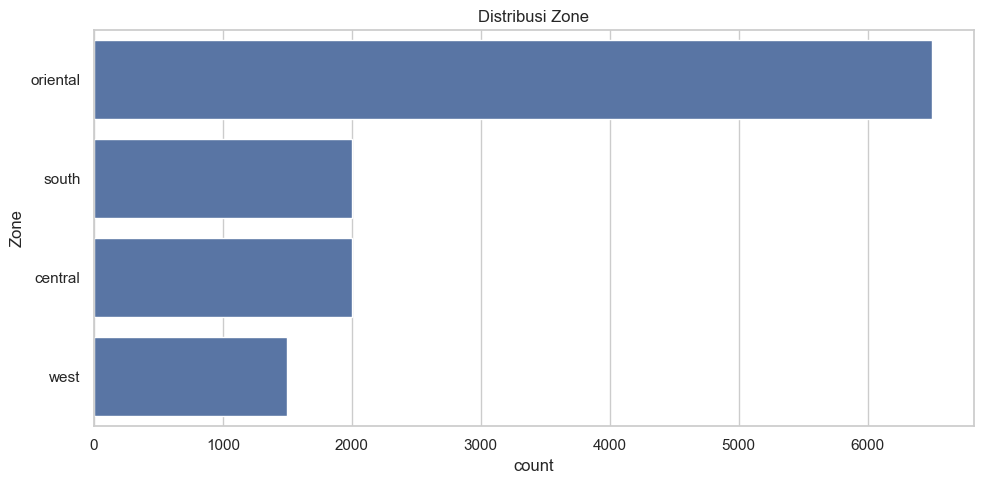


Value counts untuk Zone:
Zone
oriental    6500
south       2000
central     2000
west        1500
Name: count, dtype: int64


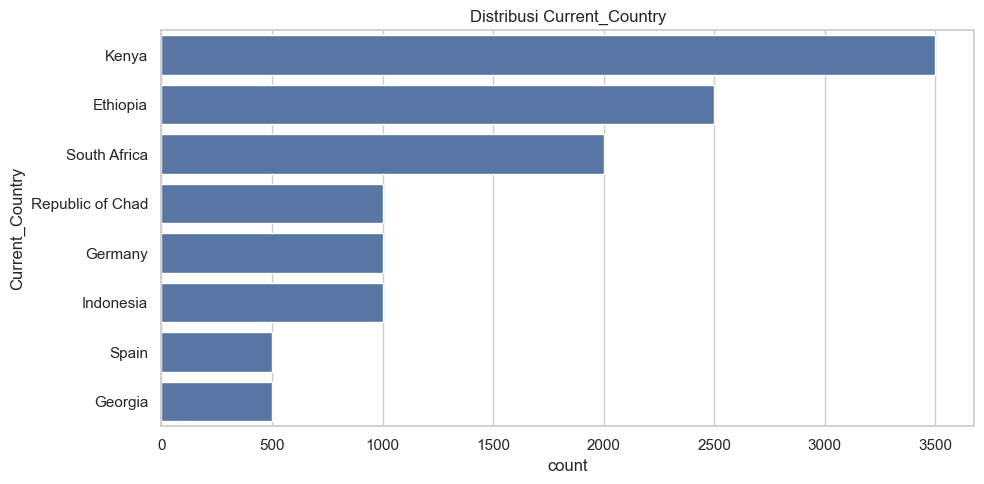


Value counts untuk Current_Country:
Current_Country
Kenya               3500
Ethiopia            2500
South Africa        2000
Republic of Chad    1000
Germany             1000
Indonesia           1000
Spain                500
Georgia              500
Name: count, dtype: int64


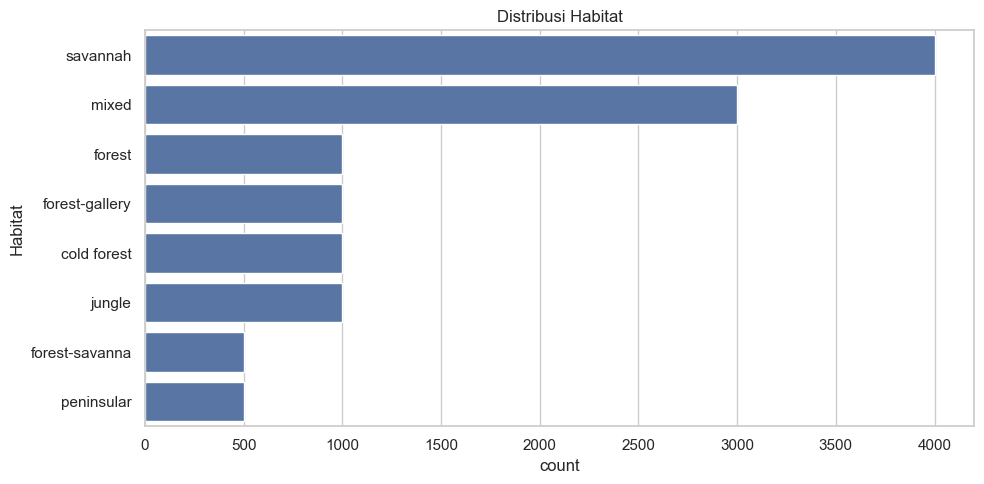


Value counts untuk Habitat:
Habitat
savannah          4000
mixed             3000
forest            1000
forest-gallery    1000
cold forest       1000
jungle            1000
forest-savanna     500
peninsular         500
Name: count, dtype: int64


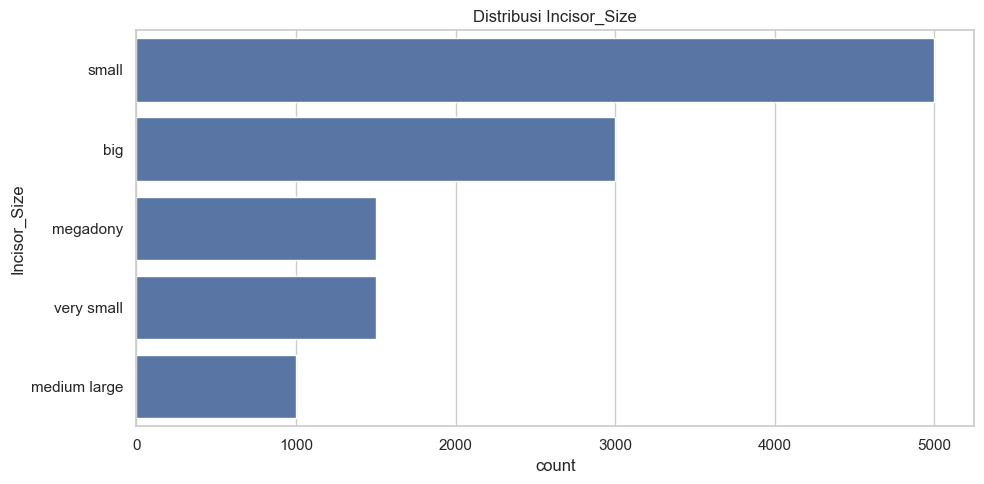


Value counts untuk Incisor_Size:
Incisor_Size
small           5000
big             3000
megadony        1500
very small      1500
medium large    1000
Name: count, dtype: int64


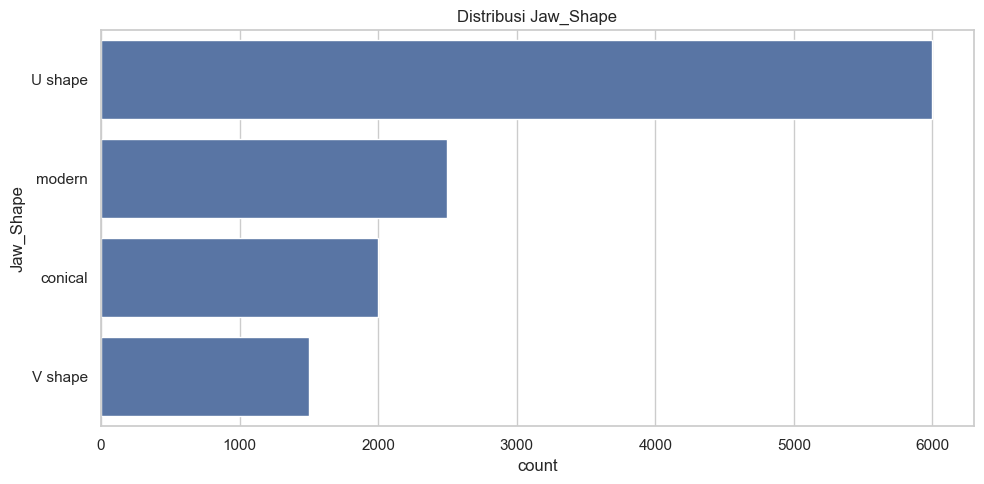


Value counts untuk Jaw_Shape:
Jaw_Shape
U shape    6000
modern     2500
conical    2000
V shape    1500
Name: count, dtype: int64


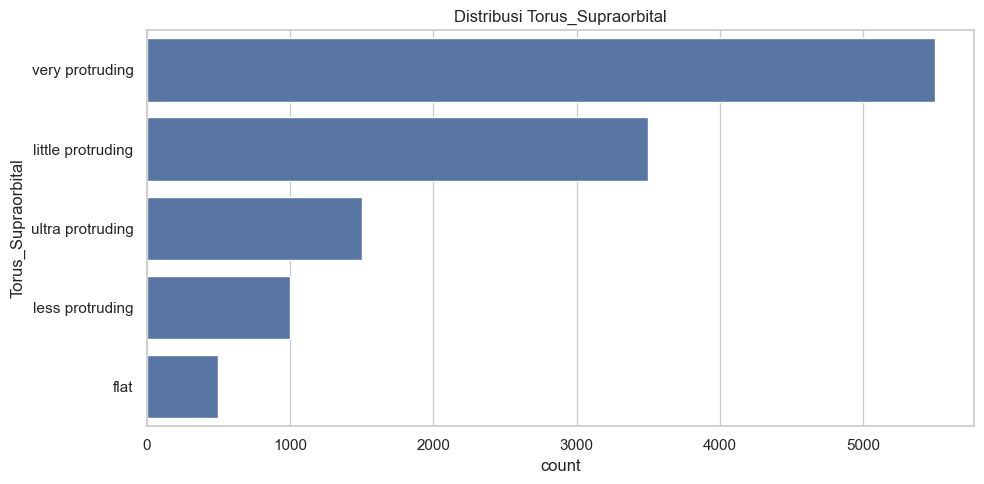


Value counts untuk Torus_Supraorbital:
Torus_Supraorbital
very protruding      5500
little protruding    3500
ultra protruding     1500
less protruding      1000
flat                  500
Name: count, dtype: int64


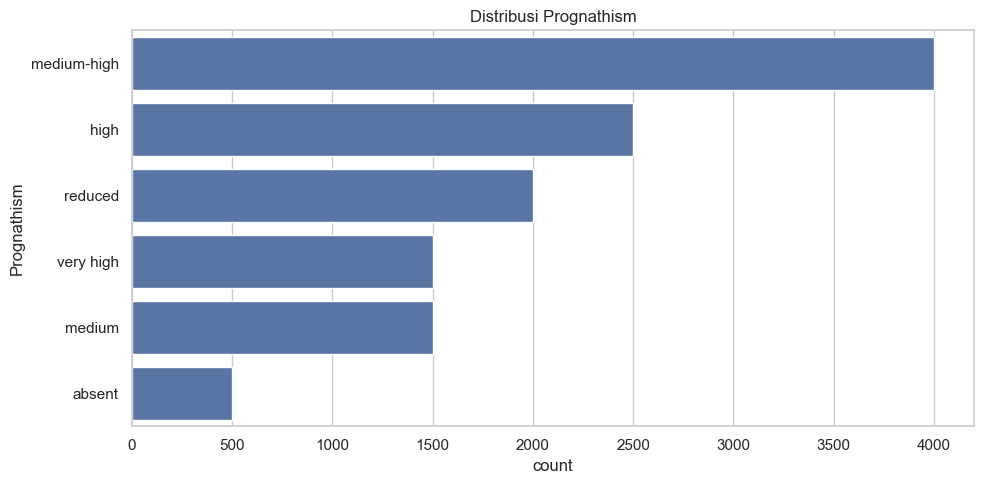


Value counts untuk Prognathism:
Prognathism
medium-high    4000
high           2500
reduced        2000
very high      1500
medium         1500
absent          500
Name: count, dtype: int64


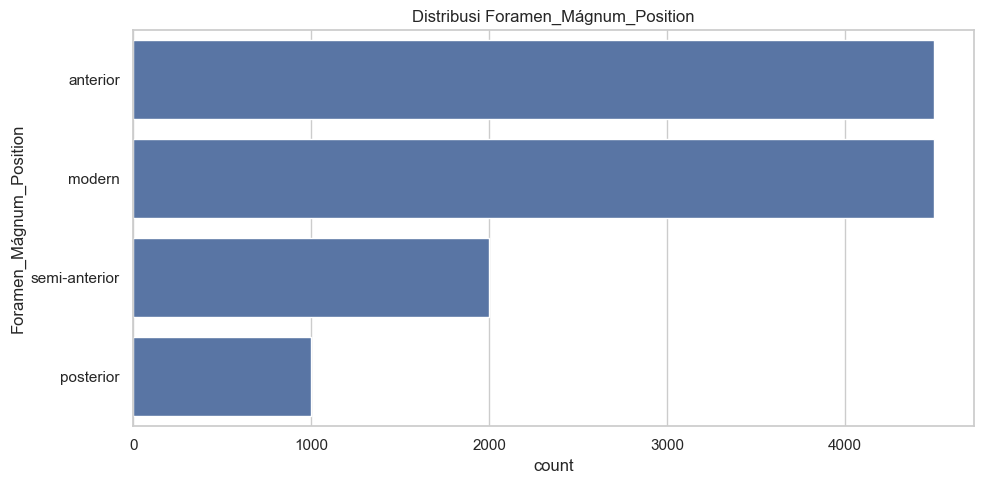


Value counts untuk Foramen_Mágnum_Position:
Foramen_Mágnum_Position
anterior         4500
modern           4500
semi-anterior    2000
posterior        1000
Name: count, dtype: int64


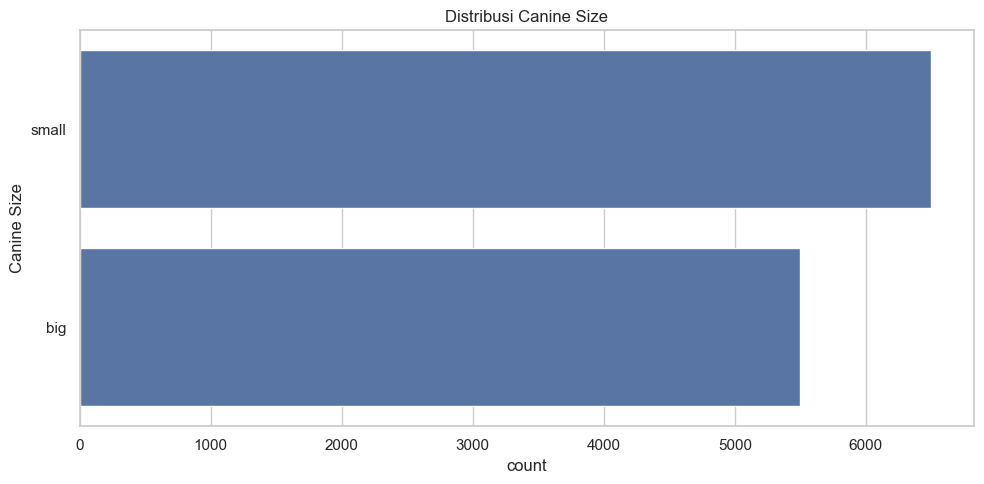


Value counts untuk Canine Size:
Canine Size
small    6500
big      5500
Name: count, dtype: int64


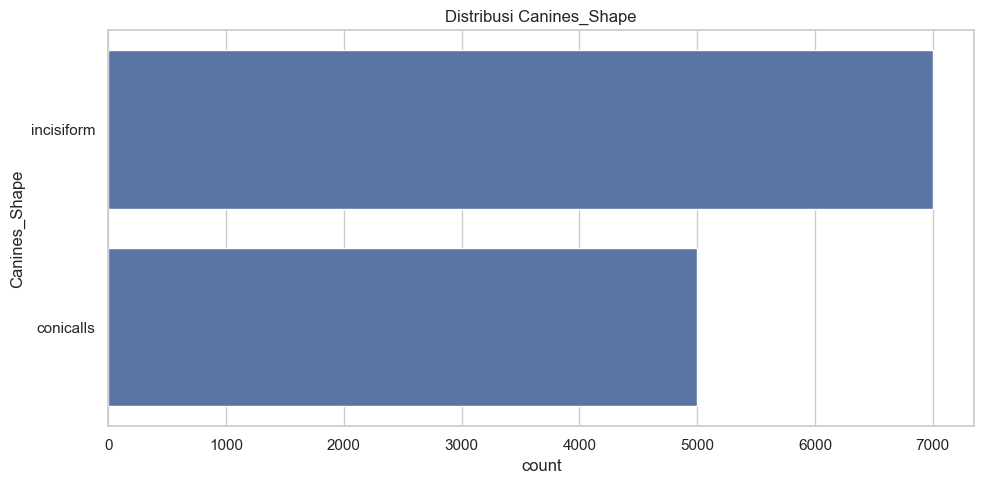


Value counts untuk Canines_Shape:
Canines_Shape
incisiform    7000
conicalls     5000
Name: count, dtype: int64


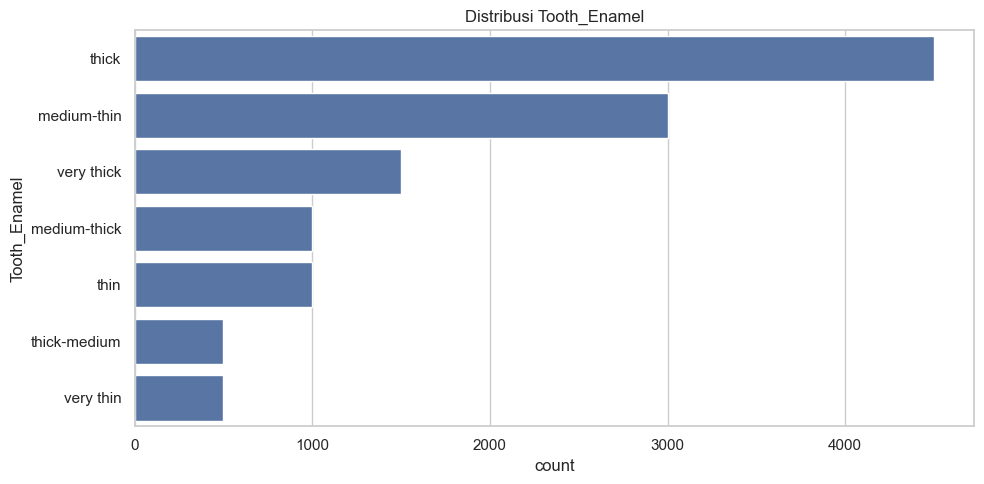


Value counts untuk Tooth_Enamel:
Tooth_Enamel
thick           4500
medium-thin     3000
very thick      1500
medium-thick    1000
thin            1000
thick-medium     500
very thin        500
Name: count, dtype: int64


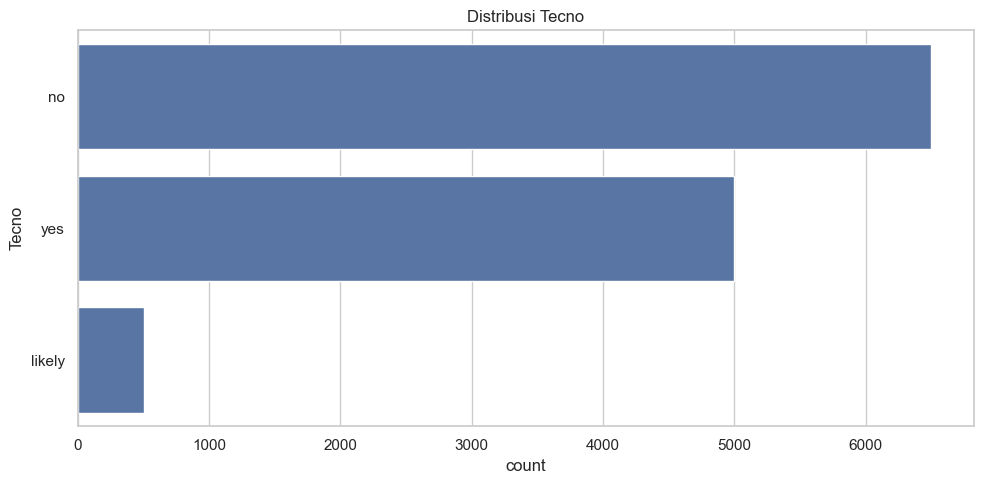


Value counts untuk Tecno:
Tecno
no        6500
yes       5000
likely     500
Name: count, dtype: int64


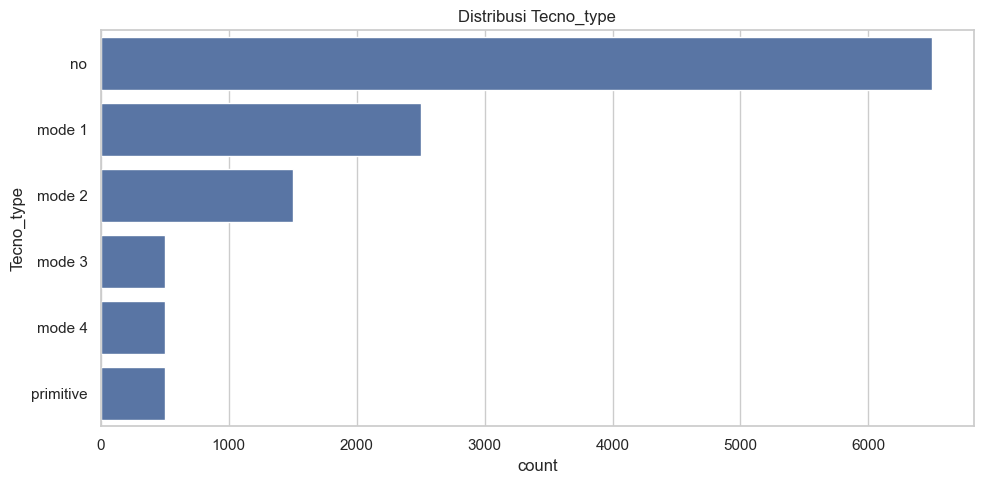


Value counts untuk Tecno_type:
Tecno_type
no           6500
mode 1       2500
mode 2       1500
mode 3        500
mode 4        500
primitive     500
Name: count, dtype: int64


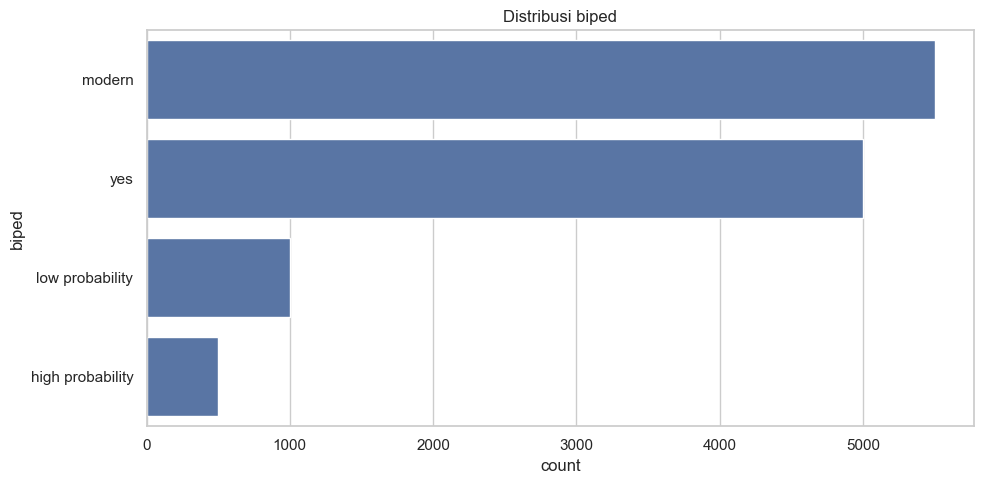


Value counts untuk biped:
biped
modern              5500
yes                 5000
low probability     1000
high probability     500
Name: count, dtype: int64


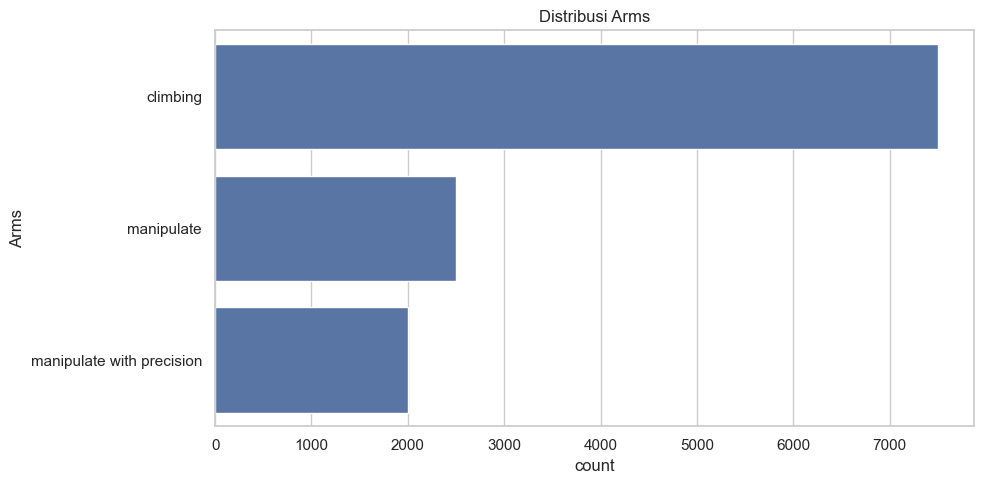


Value counts untuk Arms:
Arms
climbing                     7500
manipulate                   2500
manipulate with precision    2000
Name: count, dtype: int64


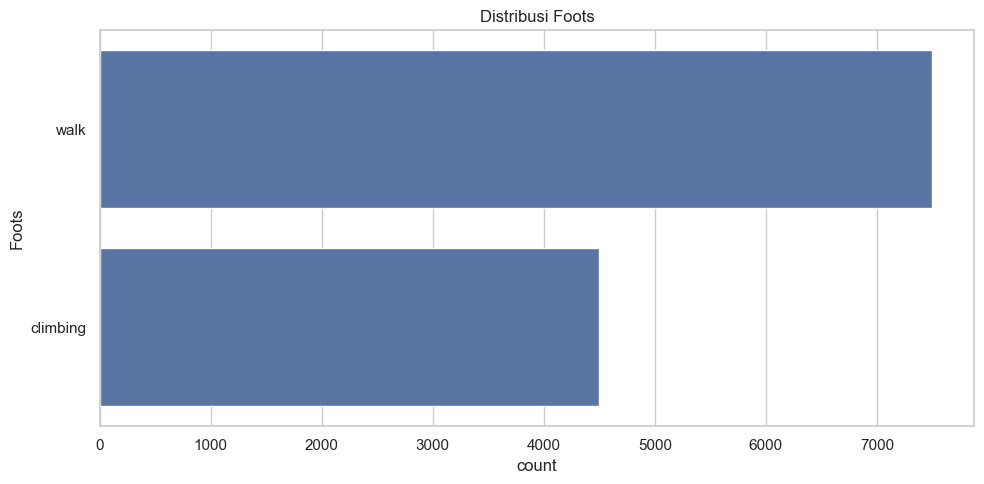


Value counts untuk Foots:
Foots
walk        7500
climbing    4500
Name: count, dtype: int64


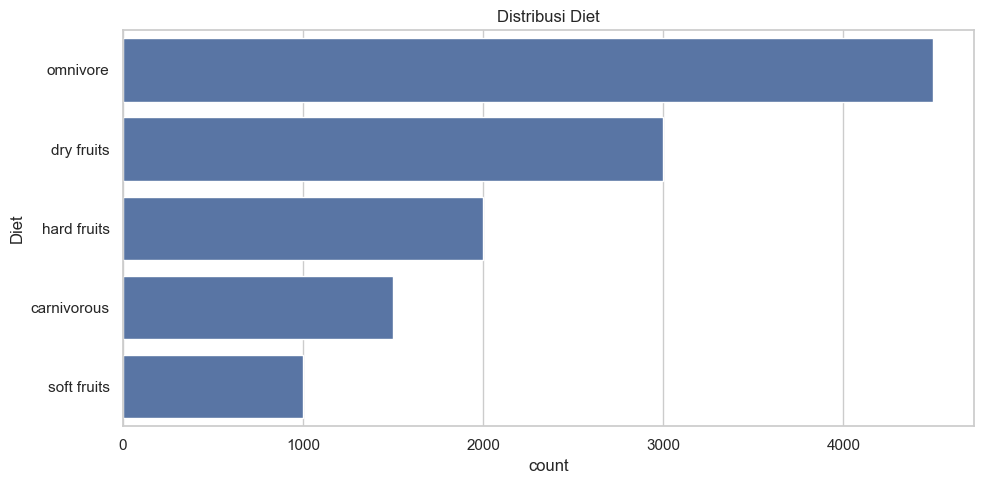


Value counts untuk Diet:
Diet
omnivore       4500
dry fruits     3000
hard fruits    2000
carnivorous    1500
soft fruits    1000
Name: count, dtype: int64


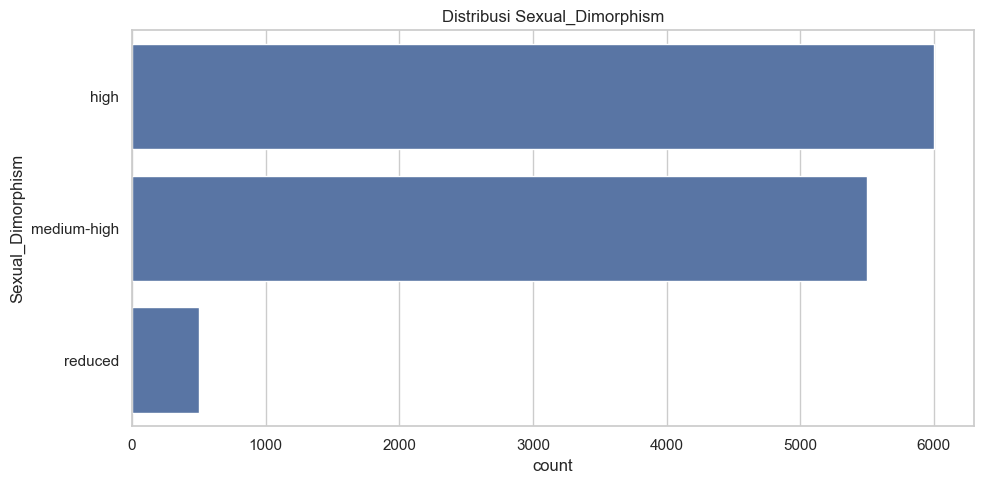


Value counts untuk Sexual_Dimorphism:
Sexual_Dimorphism
high           6000
medium-high    5500
reduced         500
Name: count, dtype: int64


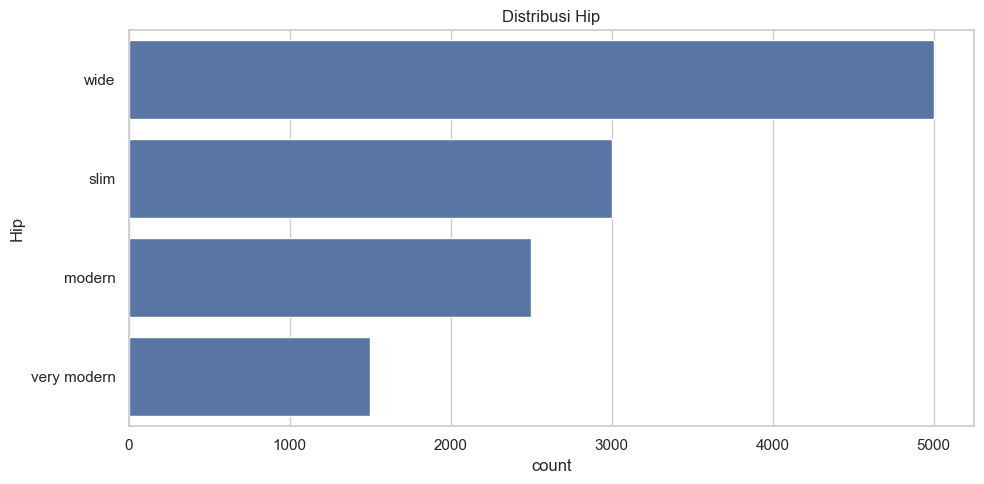


Value counts untuk Hip:
Hip
wide           5000
slim           3000
modern         2500
very modern    1500
Name: count, dtype: int64


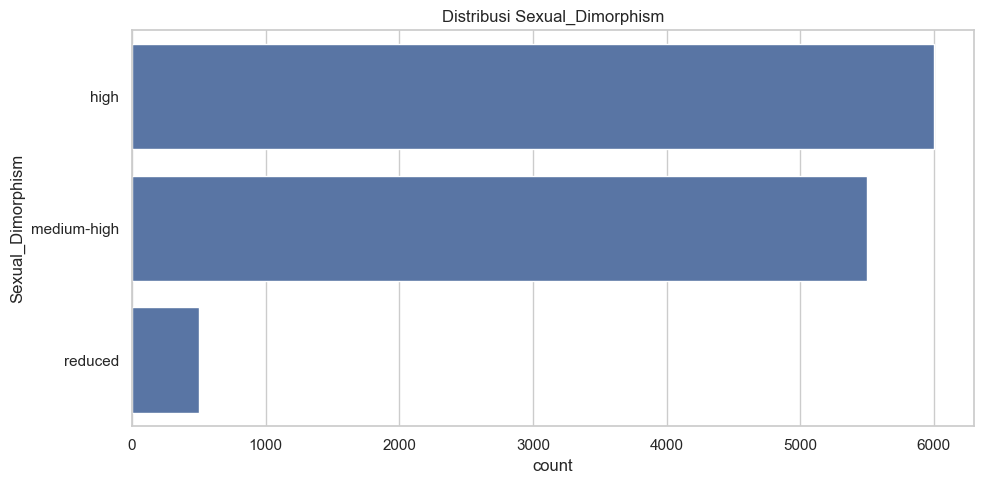


Value counts untuk Sexual_Dimorphism:
Sexual_Dimorphism
high           6000
medium-high    5500
reduced         500
Name: count, dtype: int64


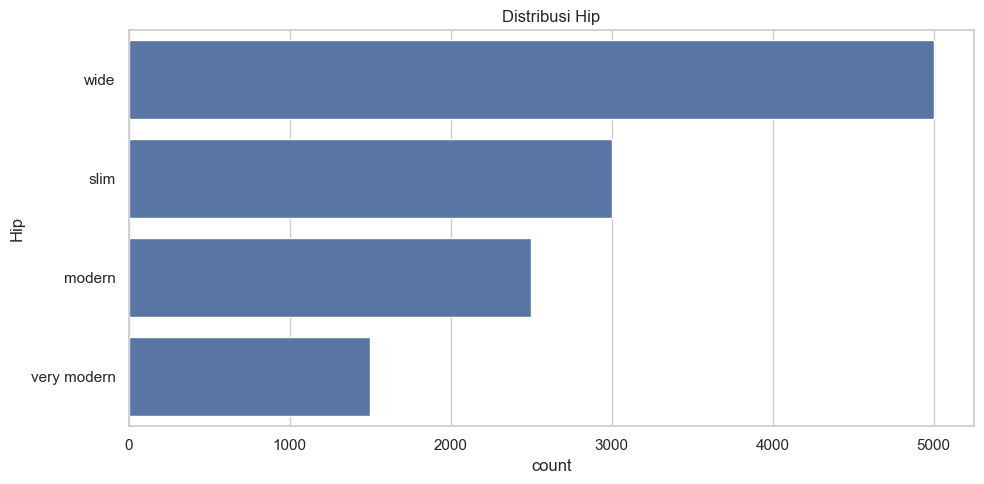


Value counts untuk Hip:
Hip
wide           5000
slim           3000
modern         2500
very modern    1500
Name: count, dtype: int64


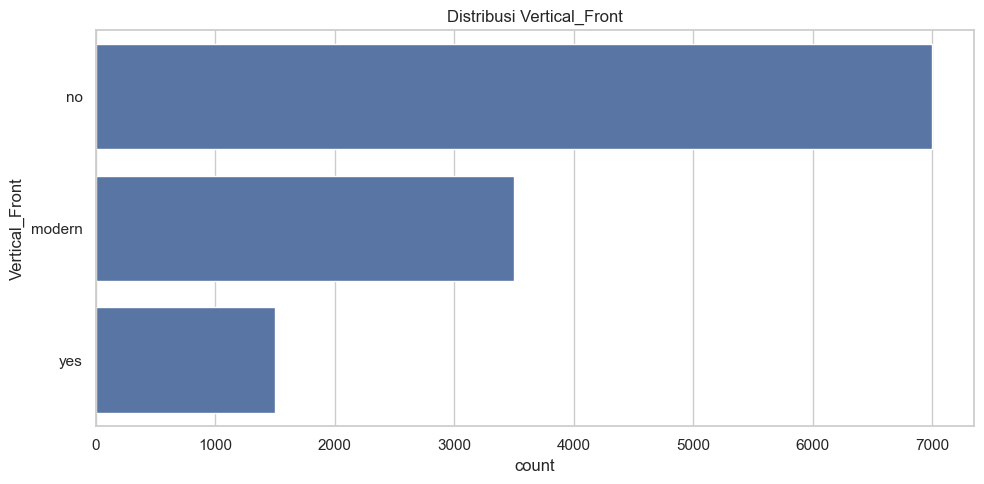


Value counts untuk Vertical_Front:
Vertical_Front
no        7000
modern    3500
yes       1500
Name: count, dtype: int64


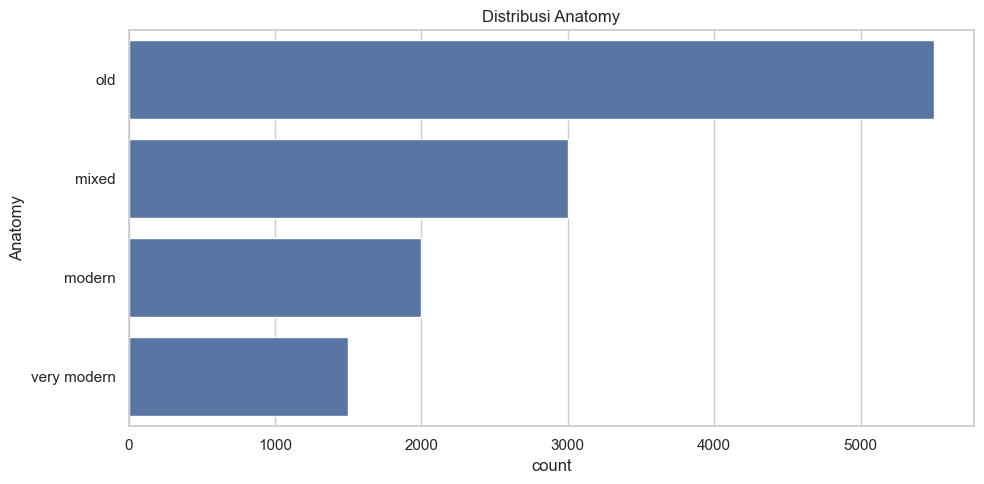


Value counts untuk Anatomy:
Anatomy
old            5500
mixed          3000
modern         2000
very modern    1500
Name: count, dtype: int64


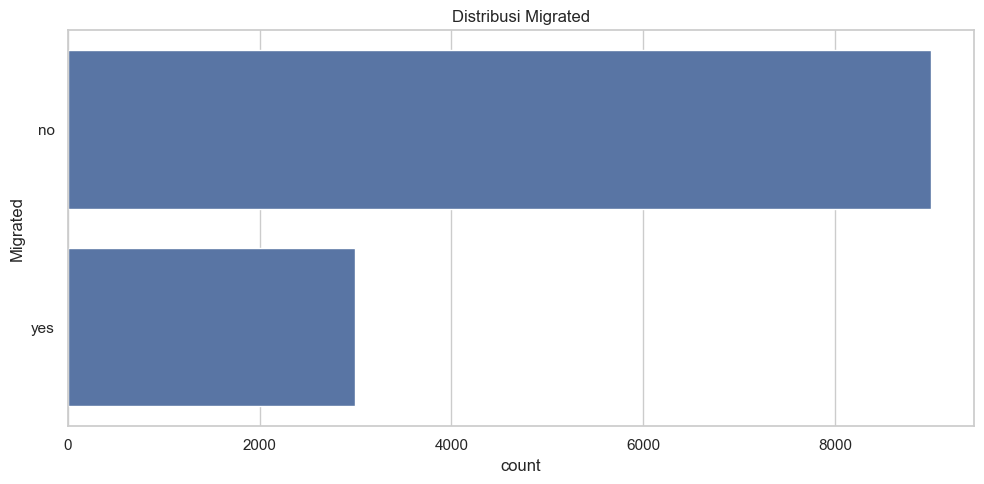


Value counts untuk Migrated:
Migrated
no     9000
yes    3000
Name: count, dtype: int64


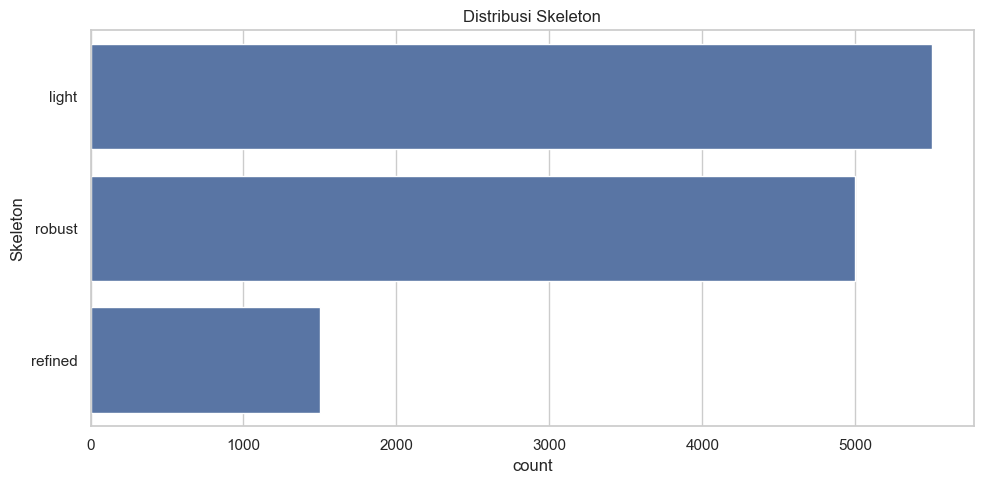


Value counts untuk Skeleton:
Skeleton
light      5500
robust     5000
refined    1500
Name: count, dtype: int64


In [35]:
if df_cleaned is not None and actual_categorical_cols:
    print("\n--- Distribusi Fitur Kategorikal ---")
    for col in actual_categorical_cols:
        plt.figure(figsize=(10, 5))
        sns.countplot(y=df_cleaned[col], order = df_cleaned[col].value_counts().index)
        plt.title(f'Distribusi {col}')
        plt.tight_layout()
        plt.show()
        
        # Print value counts jika jumlah uniknya tidak terlalu banyak
        if df_cleaned[col].nunique() < 20:
            print(f"\nValue counts untuk {col}:")
            print(df_cleaned[col].value_counts())


--- Distribusi Variabel Target ---


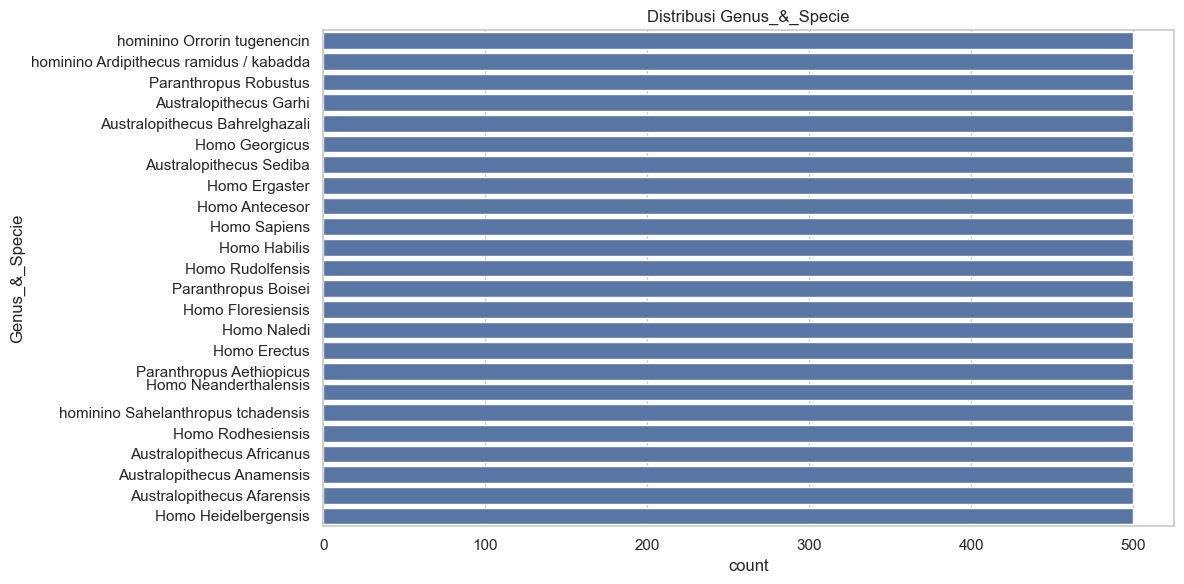


Value counts untuk Genus_&_Specie:
Genus_&_Specie
hominino Orrorin tugenencin                500
hominino Ardipithecus ramidus / kabadda    500
Paranthropus Robustus                      500
Australopithecus Garhi                     500
Australopithecus Bahrelghazali             500
Homo Georgicus                             500
Australopithecus Sediba                    500
Homo Ergaster                              500
Homo Antecesor                             500
Homo Sapiens                               500
Homo Habilis                               500
Homo Rudolfensis                           500
Paranthropus Boisei                        500
Homo Floresiensis                          500
Homo Naledi                                500
Homo Erectus                               500
Paranthropus Aethiopicus                   500
Homo Neanderthalensis\n                    500
hominino Sahelanthropus tchadensis         500
Homo Rodhesiensis                          500
Australop

In [36]:
if df_cleaned is not None and label_column in df_cleaned.columns:
    print("\n--- Distribusi Variabel Target ---")
    plt.figure(figsize=(12, 6))
    sns.countplot(y=df_cleaned[label_column], order = df_cleaned[label_column].value_counts().index)
    plt.title(f'Distribusi {label_column}')
    plt.tight_layout()
    plt.show()
    print(f"\nValue counts untuk {label_column}:")
    print(df_cleaned[label_column].value_counts())

In [37]:
if df_cleaned is not None and \
   (actual_numerical_cols or actual_categorical_cols) and \
   label_column in df_cleaned.columns:
    
    print("\n--- Menguji Fungsi Pra-pemrosesan ---")
    try:
        X_processed, y_labels, preprocessor_obj, feature_names_out = preprocess_data(
            df_cleaned.copy(), 
            actual_numerical_cols, 
            actual_categorical_cols, 
            label_column
        )
        
        print("\nDimensi data fitur setelah pra-pemrosesan:", X_processed.shape)
        print("Contoh data fitur setelah pra-pemrosesan (5 baris pertama):")
        print(X_processed[:5])
        
        print("\nLabel (5 label pertama):")
        print(y_labels[:5])
        
        print("\nNama fitur setelah encoding:")
        print(feature_names_out)
        print(f"Jumlah fitur hasil encoding: {len(feature_names_out)}")

        # Simpan preprocessor jika diperlukan untuk digunakan nanti (misalnya pada data tes)
        # import joblib
        # joblib.dump(preprocessor_obj, 'preprocessor.joblib')
        # print("\nObjek preprocessor disimpan ke preprocessor.joblib")

    except Exception as e:
        print(f"Error saat menjalankan pra-pemrosesan: {e}")
        import traceback
        traceback.print_exc()

else:
    if df_cleaned is not None:
        print("\nTidak dapat melanjutkan ke pengujian pra-pemrosesan karena kolom fitur atau label tidak terdefinisi dengan benar.")


--- Menguji Fungsi Pra-pemrosesan ---

Dimensi data fitur setelah pra-pemrosesan: (12000, 110)
Contoh data fitur setelah pra-pemrosesan (5 baris pertama):
[[ 1.97445632 -1.3257424  -0.86432564  1.          0.          0.
   0.          1.          0.          0.          0.          0.
   0.          0.          1.          0.          0.          0.
   0.          1.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          1.
   0.          0.          0.          1.          0.          0.
   0.          0.          0.          1.          0.          1.
   0.          0.          0.          0.          0.          0.
   1.          0.          1.          0.          1.          0.
   0.          0.          1.          0.          0.          0.
   0.          0.          1.          0.          0.          0.
   0.          0.          1.          0.          0.          1.
   0.          0.          1.          0.          0

Jumlah fitur asli yang akan dipertimbangkan GA: 27

Memulai pengujian GA untuk Feature Selection...
Memulai Algoritma Genetik untuk Seleksi Fitur...
Generasi 1/20 - Fitness Terbaik: 0.9970 (Akurasi di gen ini: 0.9970)
Generasi 2/20 - Fitness Terbaik: 0.9970 (Akurasi di gen ini: 0.9967)
Generasi 3/20 - Fitness Terbaik: 0.9970 (Akurasi di gen ini: 0.9970)
Generasi 4/20 - Fitness Terbaik: 0.9974 (Akurasi di gen ini: 0.9974)
Generasi 5/20 - Fitness Terbaik: 0.9978 (Akurasi di gen ini: 0.9978)
Generasi 6/20 - Fitness Terbaik: 0.9978 (Akurasi di gen ini: 0.9978)
Generasi 7/20 - Fitness Terbaik: 0.9978 (Akurasi di gen ini: 0.9974)
Generasi 8/20 - Fitness Terbaik: 0.9978 (Akurasi di gen ini: 0.9974)
Generasi 9/20 - Fitness Terbaik: 0.9978 (Akurasi di gen ini: 0.9974)
Generasi 10/20 - Fitness Terbaik: 0.9978 (Akurasi di gen ini: 0.9978)
Generasi 11/20 - Fitness Terbaik: 0.9978 (Akurasi di gen ini: 0.9970)
Generasi 12/20 - Fitness Terbaik: 0.9978 (Akurasi di gen ini: 0.9974)
Generasi 13/20 - Fit

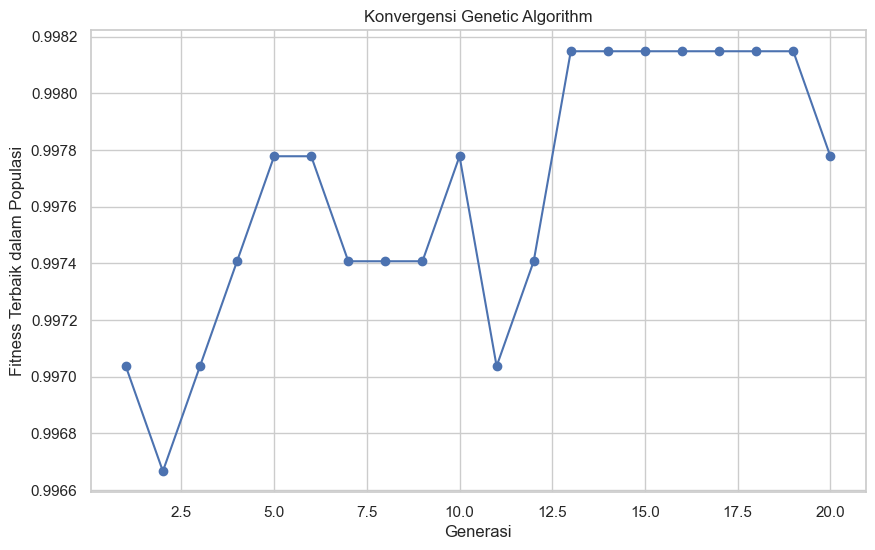

In [42]:
# Muat ulang data jika perlu atau gunakan df_cleaned dari sel sebelumnya
if 'df_cleaned' not in locals() or df_cleaned is None:
    print("DataFrame 'df_cleaned' tidak ditemukan. Muat ulang data.")
    DATA_PATH = '../data/raw/Evolution_DataSets.csv' # Sesuaikan path
    df_cleaned = pd.read_csv(DATA_PATH)
    df_cleaned.dropna(inplace=True) # Contoh cleaning sederhana

if df_cleaned is not None:
    # Definisi kolom dari sel sebelumnya (PASTIKAN SUDAH BENAR DAN SESUAI CSV)
    # potential_numerical_cols = [...] (dari sel sebelumnya)
    # potential_categorical_cols = [...] (dari sel sebelumnya)
    # label_column = 'Genus_&_Specie'

    # Ini harus berupa DAFTAR SEMUA FITUR ASLI yang akan dipertimbangkan GA
    # (total 27 fitur sesuai dokumen desain)
    # Contoh: (ANDA HARUS MENGISI INI DENGAN NAMA KOLOM YANG BENAR DARI CSV ANDA, KECUALI LABEL)
    all_original_feature_names_for_ga = [
        'Time', 'Location', 'Zone', 'Current_Country', 'Habitat', 'Cranial_Capacity', 
        'Height', 'Incisor_Size', 'Jaw_Shape', 'Torus_Supraorbital', 'Prognathism', 'Foramen_Mágnum_Position', 
        'Canine Size', 'Canines_Shape', 'Tooth_Enamel', 'Tecno', 'Tecno_type', 'biped', 'Arms', 'Foots', 'Diet', 
        'Sexual_Dimorphism', 'Hip', 'Vertical_Front', 'Anatomy', 'Migrated', 'Skeleton'] 


    # Filter lagi kolom numerik dan kategorikal berdasarkan daftar `all_original_feature_names_for_ga`
    actual_numerical_cols_for_ga = [col for col in potential_numerical_cols if col in all_original_feature_names_for_ga]
    actual_categorical_cols_for_ga = [col for col in potential_categorical_cols if col in all_original_feature_names_for_ga]
    
    num_actual_features_for_ga = len(all_original_feature_names_for_ga)
    print(f"Jumlah fitur asli yang akan dipertimbangkan GA: {num_actual_features_for_ga}")


    # Parameter untuk GA (sesuai dokumen desain)
    params_ga = {
        "population_size": 50,
        "num_generations": 20, # Untuk debugging awal, bisa dinaikkan nanti
        "crossover_prob": 0.8,
        "mutation_prob": 0.05, # Contoh dari dokumen
        "num_features": num_actual_features_for_ga, # Panjang kromosom
        "fitness_params": { # Parameter spesifik untuk fungsi fitness
            "svm_kernel": 'rbf',
            "svm_c": 1.0,
            "k_folds": 5, # 5-fold CV untuk fitness
            "penalty_factor": 0.01 # Sesuai dokumen
        }
    }

    print("\nMemulai pengujian GA untuk Feature Selection...")
    
    # Inisialisasi dan jalankan GA
    # Pastikan df_cleaned tidak mengandung NaN di fitur atau label yang digunakan
    ga_fs_instance = ga_core.GeneticAlgorithmFeatureSelection(
        original_df=df_cleaned.copy(), # Berikan salinan df yang sudah bersih
        label_col=label_column,
        all_original_feature_names=all_original_feature_names_for_ga,
        numerical_cols_original=actual_numerical_cols_for_ga,
        categorical_cols_original=actual_categorical_cols_for_ga,
        **params_ga
    )
    
    try:
        best_chromosome, best_fitness, selected_features, convergence = ga_fs_instance.run()
        
        print("\n--- Hasil Akhir dari GA Feature Selection ---")
        print(f"Kromosom Terbaik: {best_chromosome}")
        print(f"Fitness Terbaik: {best_fitness:.4f}")
        print(f"Fitur Terpilih ({len(selected_features)} fitur): {selected_features}")

        # Plotting konvergensi
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, len(convergence) + 1), convergence, marker='o')
        plt.title('Konvergensi Genetic Algorithm')
        plt.xlabel('Generasi')
        plt.ylabel('Fitness Terbaik dalam Populasi')
        plt.grid(True)
        plt.show()
        
    except Exception as e:
        print(f"Terjadi error saat menjalankan GA Feature Selection: {e}")
        import traceback
        traceback.print_exc()
else:
    print("Dataset (df_cleaned) tidak tersedia. Tidak dapat menjalankan pengujian GA.")
